In [1]:
import pandas as pd
import numpy as np
import multiprocess as mp
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Model

Logistic:

$$p=\frac{1}{1+e^{-\sum_i c_i x^i}}$$

We choose the coefficients $c$ such that only a small subset is relevant.


In [2]:
def model(X):
    n=X.shape[1]
    err=np.random.normal(0,0.1,X.shape[0])
    if n<=5:
        C=np.random.normal(10,0.1,n)
    else:
        c1=np.random.normal(10,0.1,5)
        c2=np.random.normal(0,0.01,n-5)
        C=np.concatenate([c1,c2])
    np.random.shuffle(C)
    w=np.dot(X,C)
    p=1/(1+np.exp(-w+err))

    return (p>0.5).astype('int')

In [3]:
def scores(t):
    ml,d,N=t
    X=np.random.rand(N,d)*2-1
    Y=model(X)
    xtrain,xtest,ytrain, ytest=train_test_split(X,Y,test_size=0.2)
    ml.fit(xtrain,ytrain)
    acc_train=ml.score(xtrain,ytrain)
    acc_test=ml.score(xtest,ytest)
    
    return acc_train, acc_test

In [4]:
def simulations(model, N=1000):
    dims=[3,5,10,15,20,25,50,100,200,300,400,500,600,700,800,1000]


    params=model.get_params()
    lst=[(model.__class__(**params),d,N) for d in dims]
    
    with mp.Pool(mp.cpu_count()) as pool:
        result=pool.map(scores,lst)
        
    train=[a for a,_ in result]
    test=[b for _,b in result]

    return dims, train,test

# Logistic Regression

In [5]:
lgr=LogisticRegression()

In [29]:
def train_test_scores(ml,n_list=[100,10**3,10**4]):
    Train_list=[]
    Test_list=[]
    for N in n_list:
        dims, train,test=simulations(ml,N)
        Train_list.append(train)
        Test_list.append(test)

    return n_list, dims, Train_list, Test_list

def model_acc_plot(dims,Train_list,Test_list,n_list):

    legend=[]
    colors=['#f50a60','#0aaef2','#6dc781']
    plt.figure(figsize=(15,10))
    for N,train, c in zip(n_list,Train_list,colors):
        plt.plot(dims,train,linestyle='--',color=c)
        legend+=[f'train {N}']

    for N,test,c in zip(n_list,Test_list,colors):
        plt.plot(dims,test,color=c)
        legend+=[f'test {N}']  

    plt.xlabel('DIM')
    plt.ylabel('ACC %')
    plt.title('Train and Test Accuracy')
    plt.legend(legend)
    plt.xticks([5]+dims[6:])
    plt.show()

def plot_diff_acc(dims,Train_list,Test_list,n_list):
    legend=[]
    colors=['#f50a60','#0aaef2','#6dc781']
    diff=[]
    plt.figure(figsize=(15,10))
    for N,train, test, c in zip(n_list,Train_list,Test_list,colors):
        diff=np.array(train)-np.array(test)
        plt.plot(dims,diff,linestyle='-',color=c)
        legend+=[f'train-test {N}']

    plt.xlabel('DIM')
    plt.ylabel('Diff ACC %')
    plt.title('Train-Test Difference')
    plt.legend(legend)
    plt.xticks([5]+dims[6:])
    plt.show()

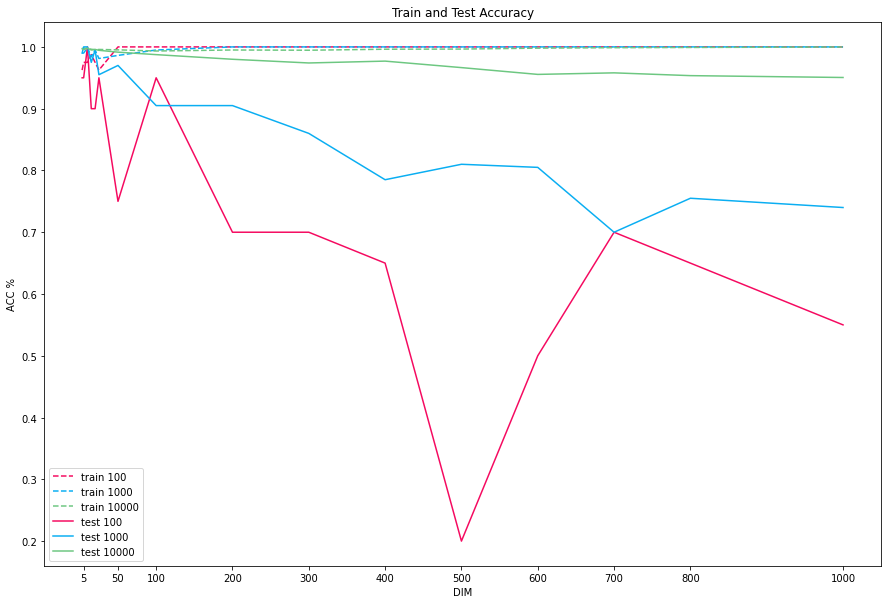

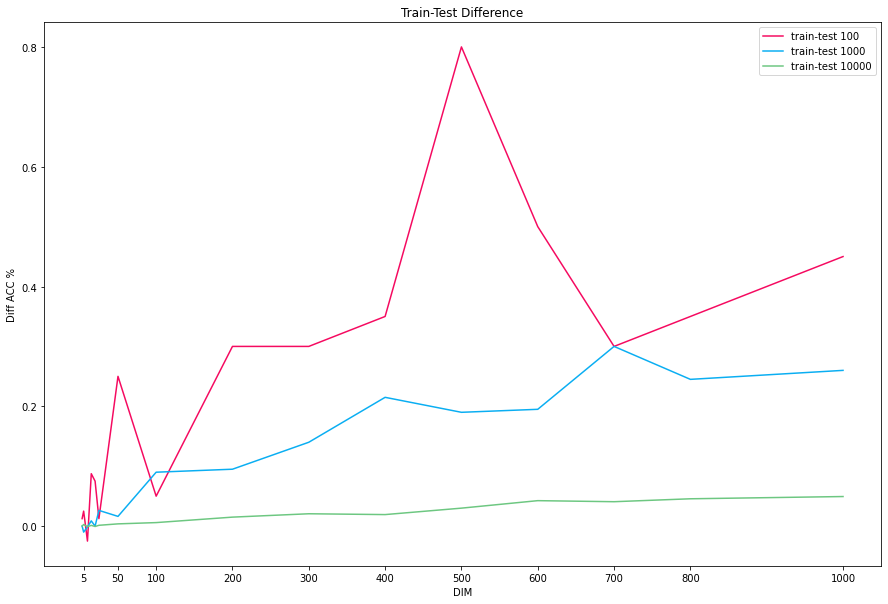

In [30]:
n_list, dims, Train_list, Test_list =train_test_scores(lgr)
model_acc_plot(dims,Train_list,Test_list,n_list)
plot_diff_acc(dims,Train_list,Test_list,n_list)

# Gradboosting

In [31]:
gb=GradientBoostingClassifier(n_estimators=10)

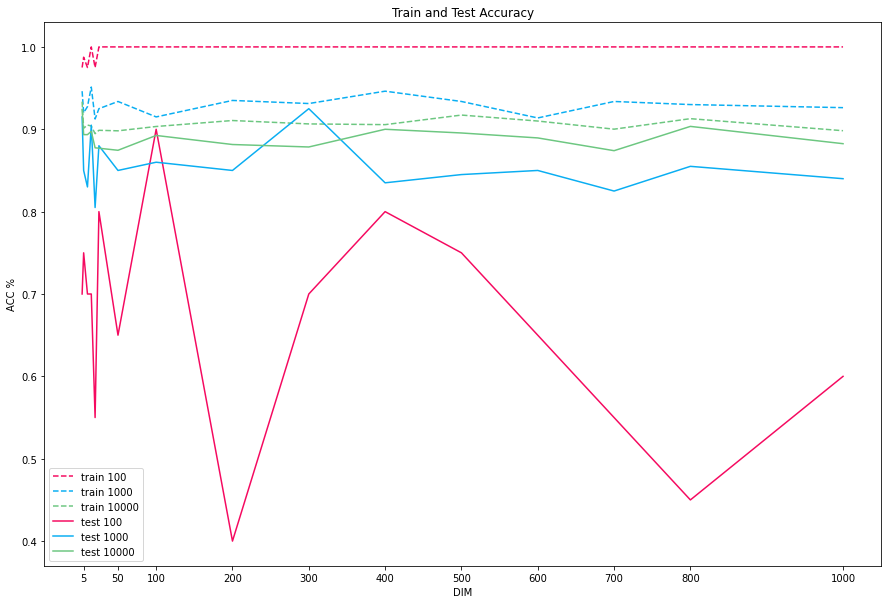

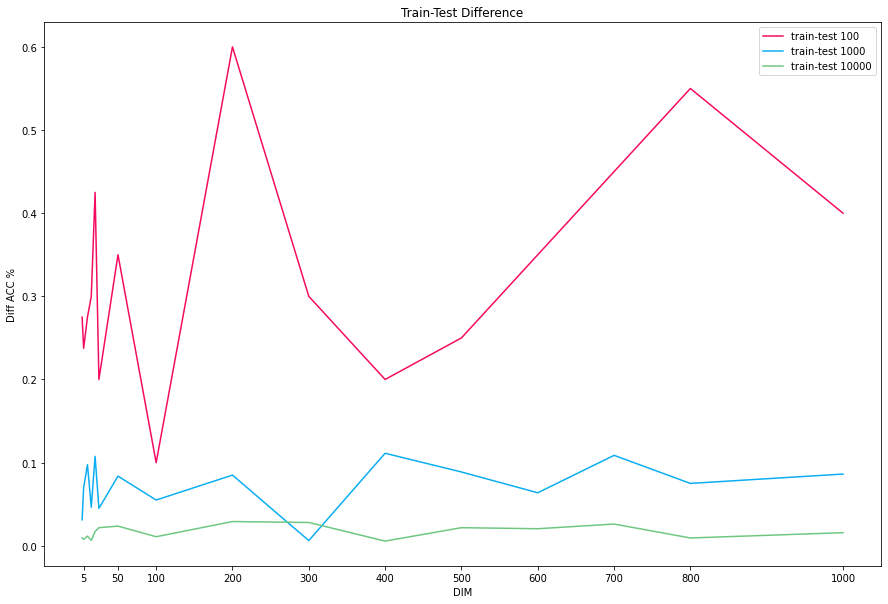

In [32]:
n_list, dims, Train_list, Test_list =train_test_scores(gb)
model_acc_plot(dims,Train_list,Test_list,n_list)
plot_diff_acc(dims,Train_list,Test_list,n_list)

# Decision Tree

In [33]:
dt=DecisionTreeClassifier(max_depth=5)

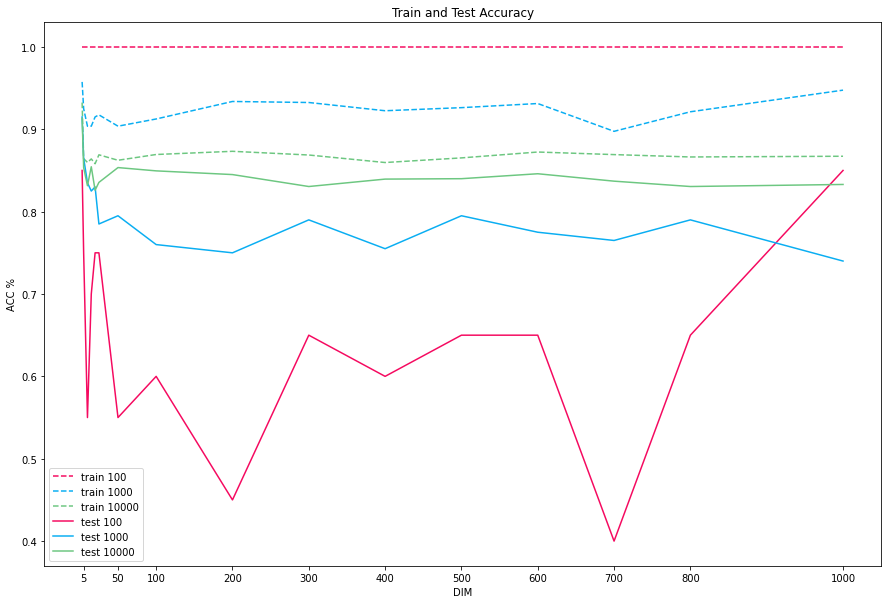

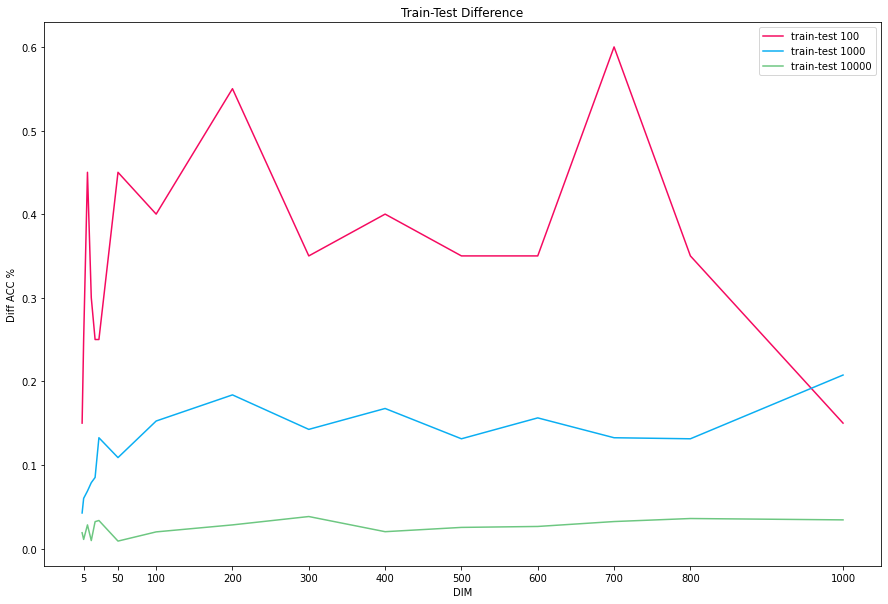

In [34]:
n_list, dims, Train_list, Test_list =train_test_scores(dt)
model_acc_plot(dims,Train_list,Test_list,n_list)
plot_diff_acc(dims,Train_list,Test_list,n_list)

# Random Forest

In [35]:
rf=RandomForestClassifier(n_estimators=15,max_depth=6)

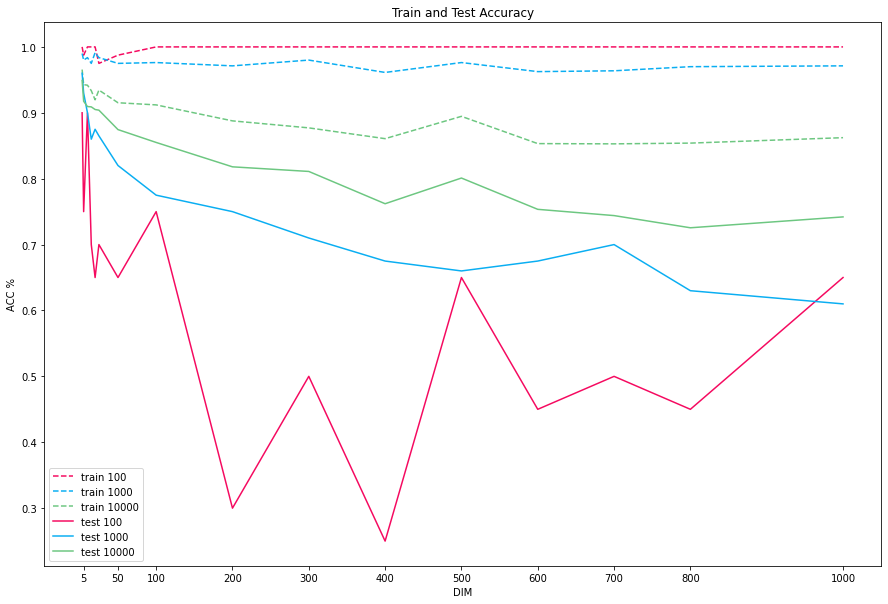

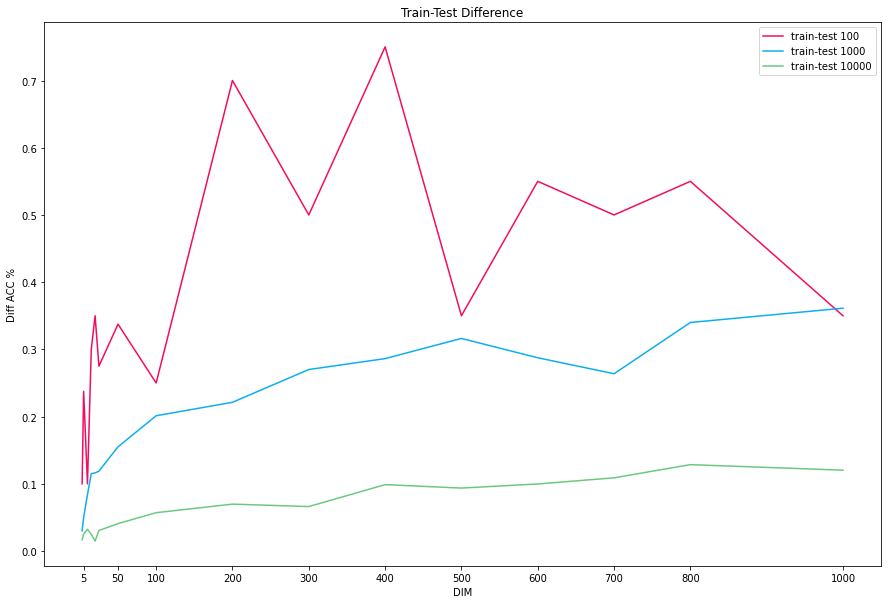

In [36]:
n_list, dims, Train_list, Test_list =train_test_scores(rf)
model_acc_plot(dims,Train_list,Test_list,n_list)
plot_diff_acc(dims,Train_list,Test_list,n_list)

# SVM

In [37]:
sv=SVC()

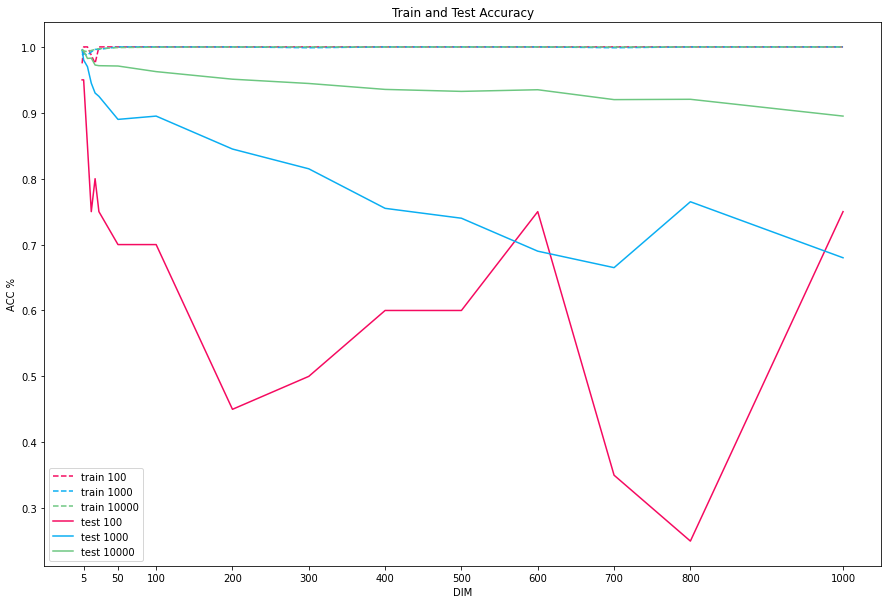

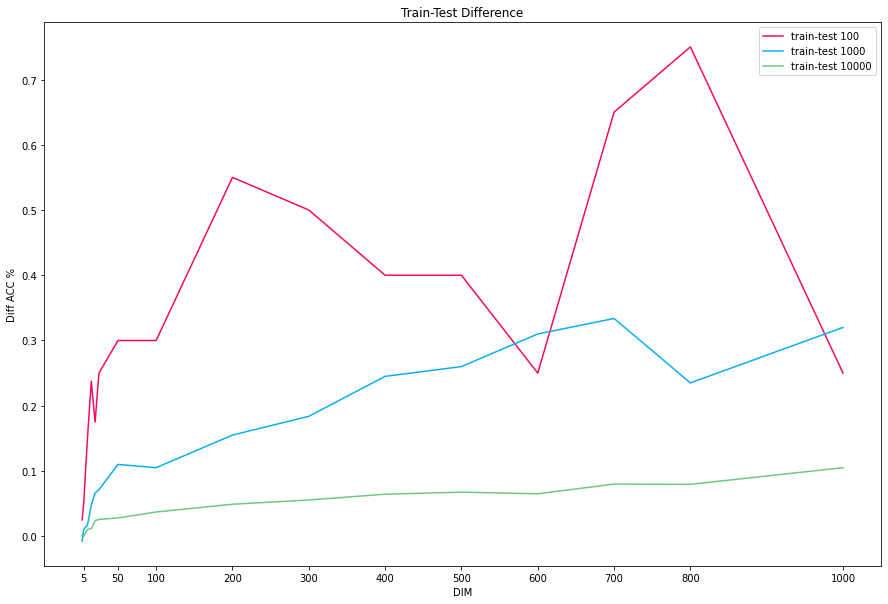

In [39]:
n_list, dims, Train_list, Test_list =train_test_scores(sv)
model_acc_plot(dims,Train_list,Test_list,n_list)
plot_diff_acc(dims,Train_list,Test_list,n_list)

# KNN

In [40]:
knn=KNeighborsClassifier(n_neighbors=1)

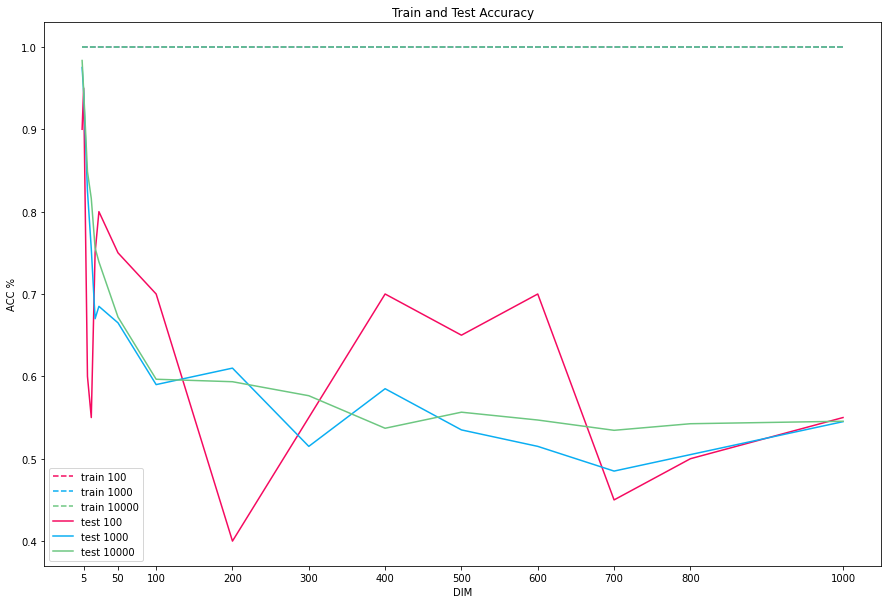

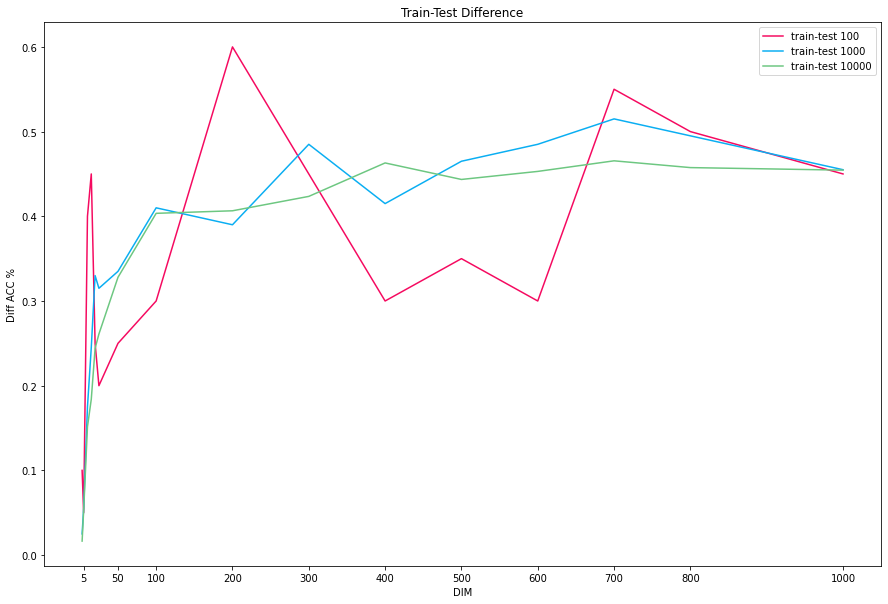

In [41]:
n_list, dims, Train_list, Test_list =train_test_scores(knn)
model_acc_plot(dims,Train_list,Test_list,n_list)
plot_diff_acc(dims,Train_list,Test_list,n_list)

In [ ]:
model_acc_plot(knn,n_list=[10**5])